# 데이터 준비

In [54]:
# 필요 패키지 import

#!pip3 install feature-engine==1.1.2 scikit-learn==0.24.2 imbalanced-learn==0.8.1

import pandas as pd
import numpy as np
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import keras.models as models
import keras.layers as layers
import keras.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore', UserWarning)

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
def reset_data():
    return pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 데이터 확인

Variable Category 확인 : Age(연령), Experience(경력), Income(소득), ZIP Cdoe(우편번호), Family(부양가족수), CCAvg,Mortgage: Numerical Variable

Binary Variable : Personal Loan(개인대출여부-Label),Securities Account(증권계좌 보유여부),CD Account(예금증서 보유여부),Online(인터넷뱅킹 사용여부),CreditCard(신용카드 사용여부)

Categorical Variable : Education(교육수준) [1: Undergrad; 2: Graduate; 3: Advanced/Professional]

In [5]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**결측치 없음 확인**

In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**변수간 상관관계 확인(Heat Map)**

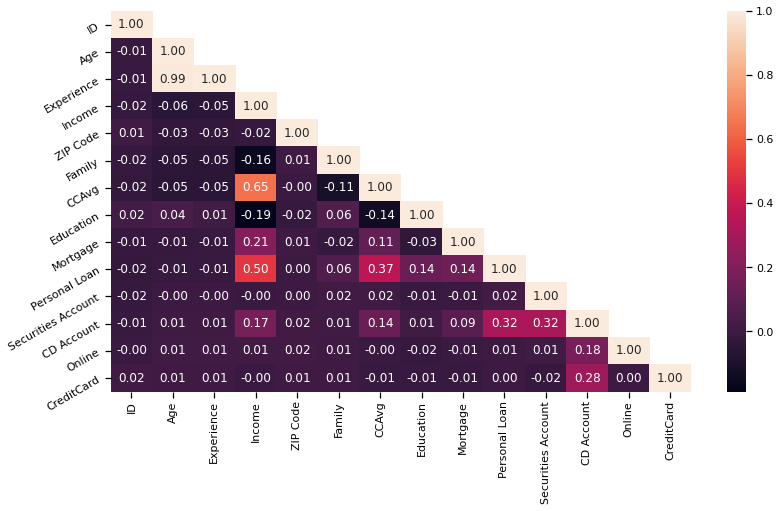

In [7]:
# Correlation with heat map
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**이상치(Outlier)확인**

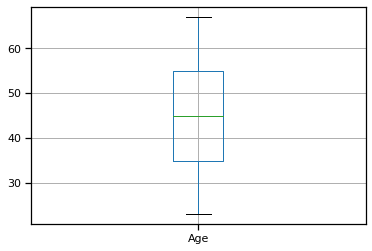

In [8]:
data.boxplot(column=["Age"])

plt.show()

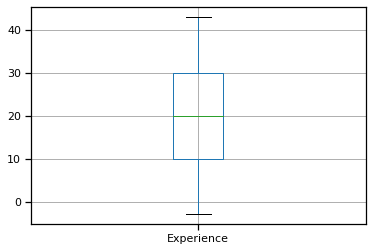

In [9]:
data.boxplot(column=["Experience"])

plt.show()

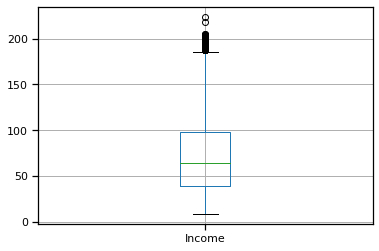

In [10]:
data.boxplot(column=["Income"])

plt.show()

이상치 확인 - 제거 필요성 확인

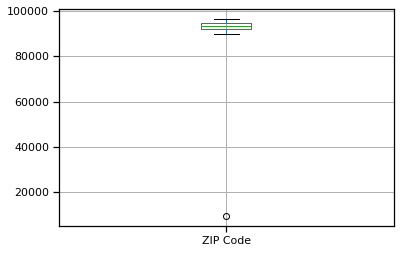

In [11]:
data.boxplot(column=["ZIP Code"])

plt.show()

이상치 확인 - 처리방법 확인

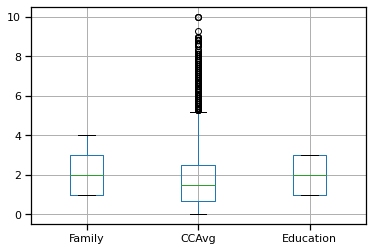

In [12]:
data.boxplot(column=["Family","CCAvg","Education"])

plt.show()

CCavg 이상치 확인 - 제거필요성 확인

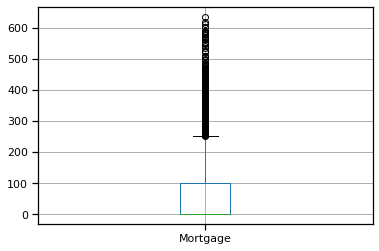

In [13]:
data.boxplot(column=["Mortgage"])

plt.show()

이상치 확인 - 제거필요성 확인

**분석(시각화)**

In [14]:
data.rename(columns= {'Personal Loan' : 'Personal_Loan'} , inplace=True)

In [15]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


                  0    1
Personal_Loan  4520  480


<Figure size 432x288 with 0 Axes>

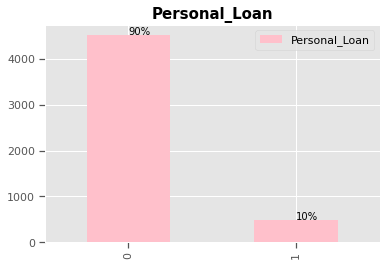

In [16]:
total = len(data['Personal_Loan'])
Personal_Loan = pd.DataFrame(data['Personal_Loan'].value_counts())
print(Personal_Loan.T)
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
ax = Personal_Loan.plot(kind='bar', color='pink')
plt.title('Personal_Loan', fontweight='bold', fontsize=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10 , '{:.0%}'.format(height/total))
plt.show()

Dataset 內 개인대출 전환률 약 10%, 480/5000

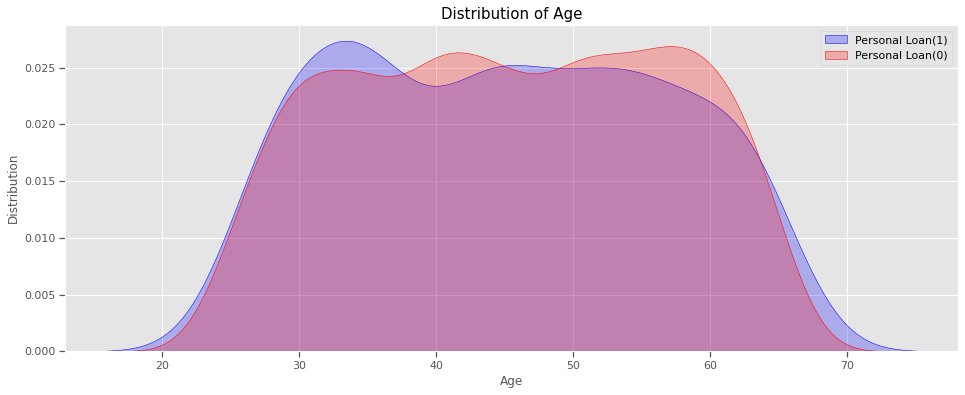

In [17]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Age'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Age'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Age', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

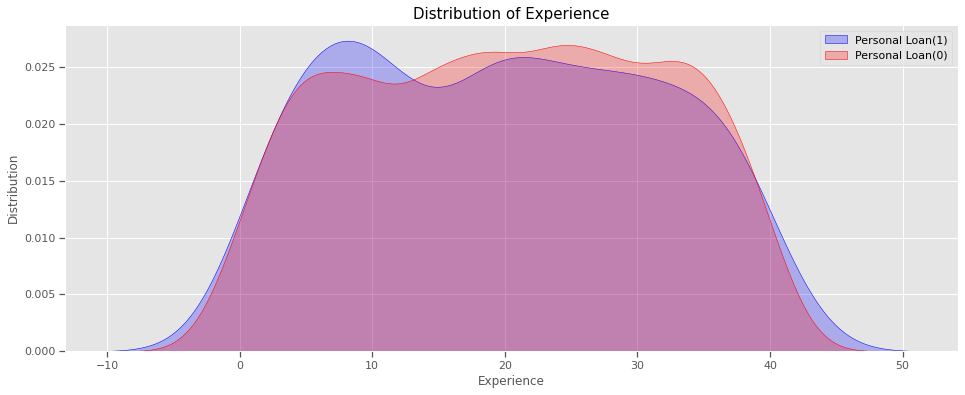

In [18]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Experience'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Experience'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Experience', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

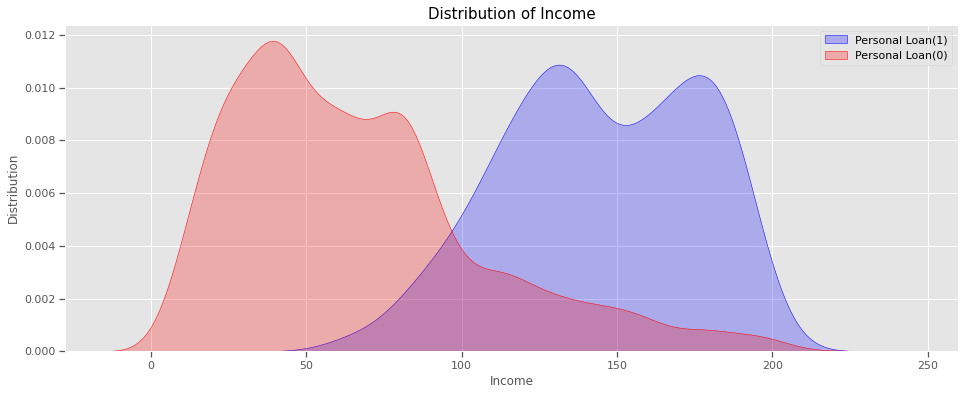

In [19]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Income'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Income'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Income', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

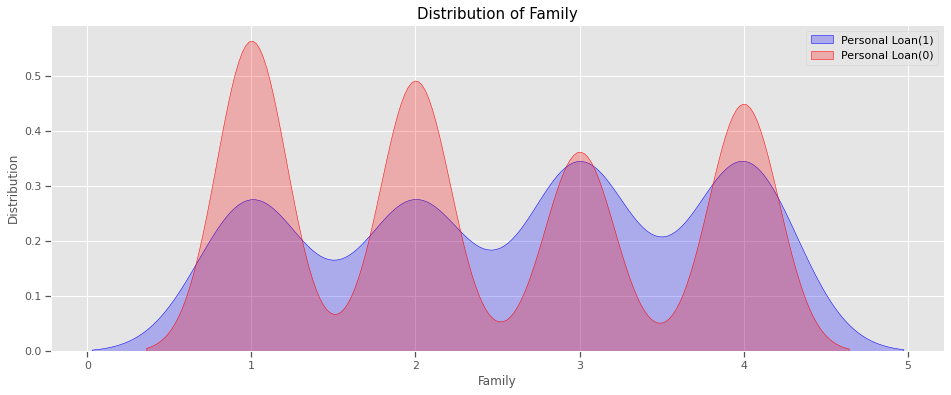

In [20]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Family'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Family'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Family', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

In [21]:
idx_nm_1 =  data[data['ZIP Code'] < 80000].index
data_drop = data.drop(idx_nm_1)

In [22]:
data_drop

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


ZIP Code가 달랐던 데이터 삭제 후 다시 그린 그래프

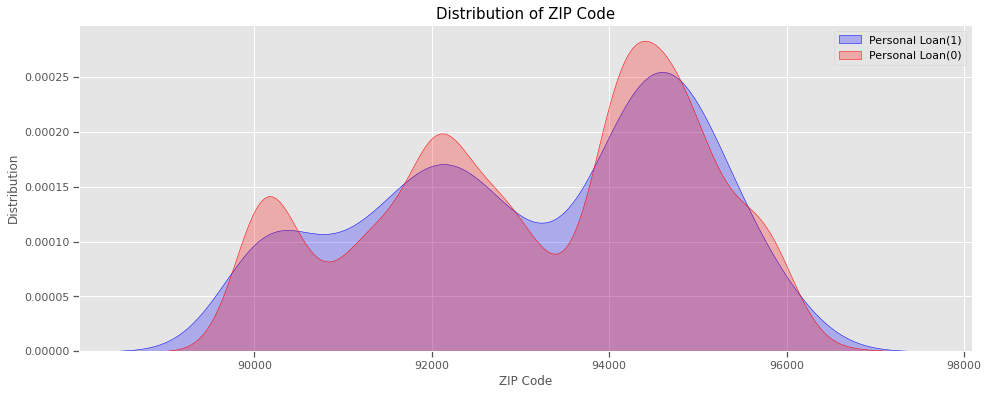

In [23]:
plt.figure(figsize=(16,6))

sns.kdeplot(data_drop['ZIP Code'][data_drop.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data_drop['ZIP Code'][data_drop.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of ZIP Code', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)


plt.show()

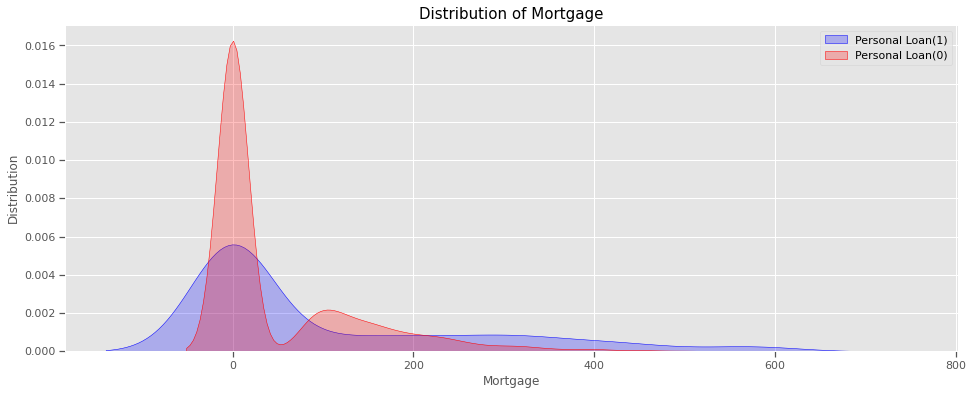

In [24]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Mortgage'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Mortgage'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Mortgage', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

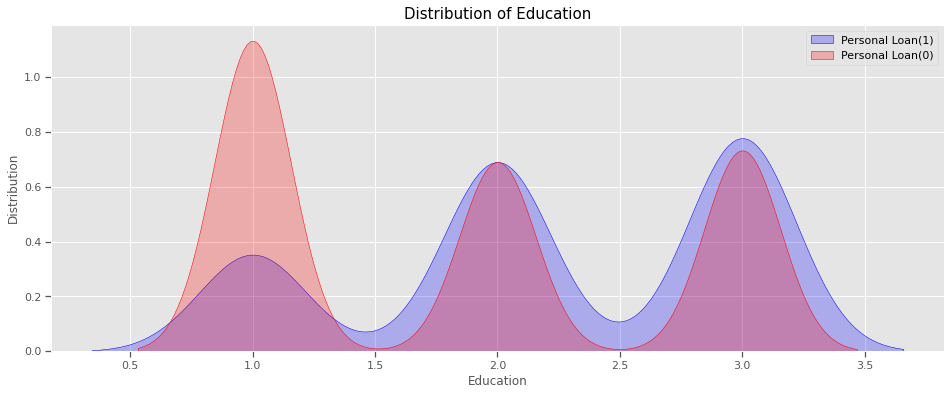

In [25]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Education'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Education'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Education', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

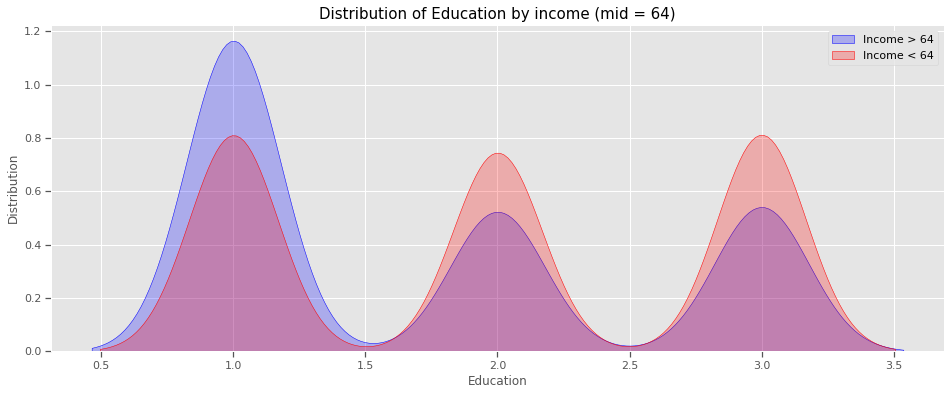

In [26]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Education'][data.Income > data['Income'].mean()], color='blue', shade=True)
sns.kdeplot(data['Education'][data.Income < data['Income'].mean()], color='red', shade=True)
plt.title('Distribution of Education by income (mid = 64)', fontsize=15)
plt.legend(['Income > 64', 'Income < 64'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

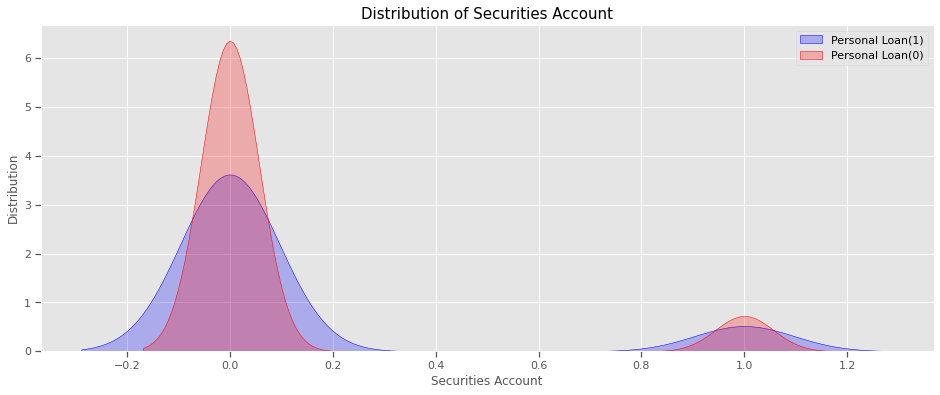

In [27]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Securities Account'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Securities Account'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Securities Account', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

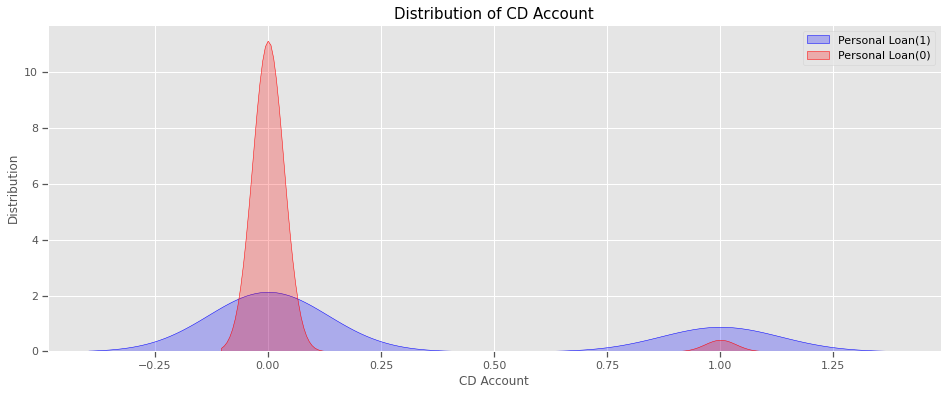

In [28]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['CD Account'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['CD Account'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of CD Account', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

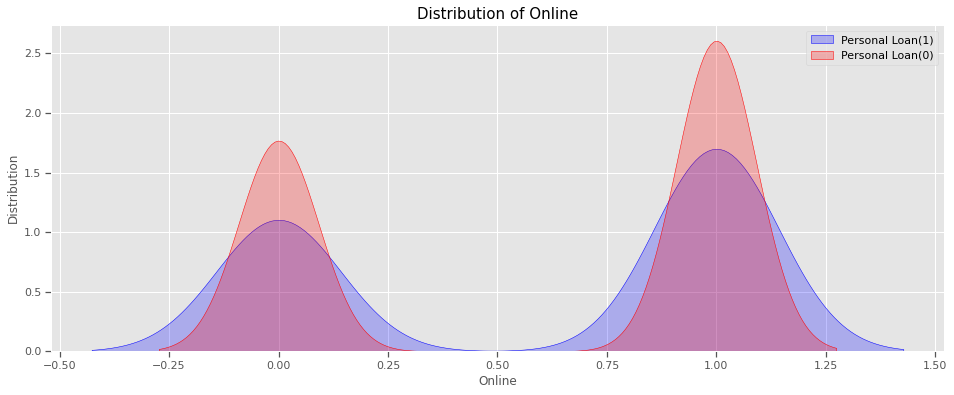

In [29]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['Online'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['Online'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of Online', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

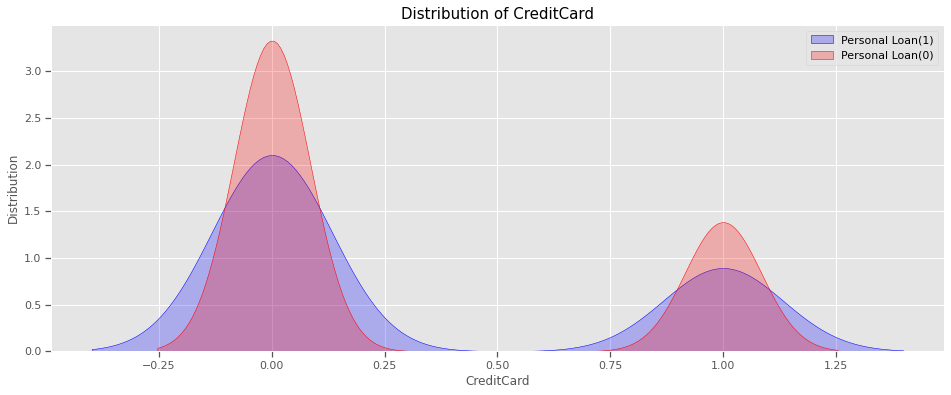

In [30]:
plt.figure(figsize=(16,6))

sns.kdeplot(data['CreditCard'][data.Personal_Loan==1], color='blue', shade=True)
sns.kdeplot(data['CreditCard'][data.Personal_Loan==0], color='red', shade=True)
plt.title('Distribution of CreditCard', fontsize=15)
plt.legend(['Personal Loan(1)', 'Personal Loan(0)'])
plt.ylabel('Distribution', fontsize=12)

plt.show()

# 데이터 전처리

- 경력이 음수 -> 각 나이 경력의 평균값 대체
- zip code 자릿수 오류 -> 삭제

In [31]:
data = reset_data()

In [32]:
# Experience outlier 평균값 대체
indexs = list(range(23, 30))
for i in indexs:
    temp = np.around(data[(data['Age'] == i) & (data['Experience'] >= 0)]['Experience'].mean())
    data.loc[(data['Experience'] < 0) & (data['Age'] == i), 'Experience'] = temp

data.fillna(0, inplace=True)

In [33]:
# ZIP Code outlier 삭제
data.drop(384, inplace=True)

In [34]:
# 중복 데이터 확인
data[data.duplicated(keep = False)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [35]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.923185,45.337267,20.125425,73.784757,93169.275455,2.396079,1.938206,1.880776,56.510102,0.096019,0.104421,0.060412,0.596719,0.293859
std,1443.354188,11.464033,11.430115,46.032281,1759.630610,1.147554,1.747731,0.839804,101.720837,0.294647,0.305836,0.238273,0.490605,0.455574
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.500000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2501.000000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.500000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X, Y 데이터 분리하기


In [36]:
X = data.drop(['Personal Loan', 'ID'], axis=1)
Y = data['Personal Loan']

In [37]:
# 라벨 값의 비율 확인 -> 오버샘플링 필요
Y.value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

In [38]:
# scale 이 필요한 컬럼들
needScale = ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

## Scaler

Numerical variable - Feature scailing

In [39]:
stdScaler = StandardScaler()

for column in needScale:
    X[column] = stdScaler.fit_transform(X[column].to_numpy().reshape(-1,1))

In [40]:
ohencoder = OneHotEncoder(variables=['Education'])
X['Education'] = X['Education'].astype(str)
X = ohencoder.fit_transform(X)

In [41]:
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,-1.774184,-1.673416,-0.538475,-1.172111,4,-0.193531,-0.555597,1,0,0,0,1,0,0
1,-0.029423,-0.098471,-0.864366,-1.750699,3,-0.250753,-0.555597,1,0,0,0,1,0,0
2,-0.552851,-0.448459,-1.364065,0.881367,1,-0.536867,-0.555597,0,0,0,0,1,0,0
3,-0.901803,-0.973441,0.569554,0.535805,1,0.435920,-0.555597,0,0,0,0,0,1,0
4,-0.901803,-1.060938,-0.625379,-1.045367,4,-0.536867,-0.555597,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425232,-1.498422,-0.734010,-0.268422,1,-0.021862,-0.555597,0,0,1,0,0,0,1
4996,-1.337994,-1.410925,-1.277161,-0.643538,4,-0.880204,0.280107,0,0,1,0,1,0,0
4997,1.540863,1.651467,-1.081627,-0.083137,2,-0.937426,-0.555597,0,0,0,0,0,0,1
4998,1.715339,1.738964,-0.538475,-1.781959,3,-0.822981,-0.555597,0,0,1,0,0,1,0


## 오버 샘플링

In [42]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

In [43]:
X.shape

(9038, 14)

In [44]:
Y.value_counts()

1    4519
0    4519
Name: Personal Loan, dtype: int64

## train / test 분리

In [45]:
# train, test 8:2 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13, stratify=Y)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [46]:
# 이후에 모델 평가에서 사용할 함수 설정

def get_clf_eval(y_test, pred):
    pred = (pred > 0.6)
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred, pos_label=1)
    re = recall_score(y_test, pred, pos_label=1)
    f1 = f1_score(y_test, pred, pos_label=1)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    pred = (pred > 0.6)
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print("=Confusion matrix=")
    print(confusion)
    print("==================")

    print(f"Acc : {acc:.4f}, Pre : {pre:.4f}")
    print(f"Re : {re:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}")

# 데이터 학습

## Keras MLP

In [47]:
model_mlp = models.Sequential(name='MLP')
model_mlp.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1], )))
#model.add(layers.Dropout(0.5))
model_mlp.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dropout(0.5))

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [48]:
model_mlp.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [72]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
hist_mlp = []
with tqdm(total=10, ascii=True) as pbar:
    for train_index, test_index in kfold.split(X_train, Y_train):
        X_train_mlp, X_val_mlp = X_train.loc[train_index], X_train.loc[test_index]
        Y_train_mlp, Y_val_mlp = Y_train.loc[train_index], Y_train.loc[test_index]
        hist_mlp = model_mlp.fit(X_train_mlp, Y_train_mlp, validation_data=(X_val_mlp, Y_val_mlp), \
                             epochs=50, use_multiprocessing=True, workers=-1, verbose=0, callbacks=hist_mlp)
        pbar.update(1)

100%|##################################################################################| 10/10 [00:51<00:00,  5.10s/it]


In [73]:
model_mlp.evaluate(X_test, Y_test)

57/57 [==============================] - 0s 331us/step - loss: 0.1060 - binary_accuracy: 0.9878


[0.10598845034837723, 0.9878318309783936]

In [74]:
model_mlp_pred = model_mlp.predict(X_test)
print_clf_eval(Y_test, model_mlp_pred)

=Confusion matrix=
[[890  14]
 [  7 897]]
Acc : 0.9884, Pre : 0.9846
Re : 0.9923, F1 : 0.9884, AUC : 0.9884


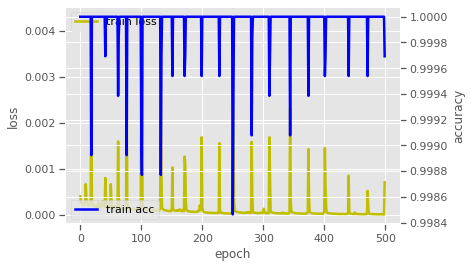

In [75]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_mlp.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_mlp.history['binary_accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

## Keras DNN

In [58]:
model_dnn = models.Sequential(name='DNN')
model_dnn.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1], )))
model_dnn.add(layers.Dense(100, activation='relu'))
model_dnn.add(layers.Dense(100, activation='relu'))
model_dnn.add(layers.Dense(1, activation='sigmoid'))
#model.add(layers.Dropout(0.5))

model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [59]:
model_dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1500      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 21,801
Trainable params: 21,801
Non-trainable params: 0
_________________________________________________________________


In [60]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
hist_dnn = []
with tqdm(total=10, ascii=True) as pbar:
    for train_index, test_index in kfold.split(X_train, Y_train):
        X_train_dnn, X_val_dnn = X_train.loc[train_index], X_train.loc[test_index]
        Y_train_dnn, Y_val_dnn = Y_train.loc[train_index], Y_train.loc[test_index]
        hist_dnn = model_dnn.fit(X_train_dnn, Y_train_dnn, validation_data=(X_val_dnn, Y_val_dnn), \
                             epochs=50, use_multiprocessing=True, workers=-1, verbose=0, callbacks=hist_dnn)
        pbar.update(1)

10it [01:00,  6.01s/it]


In [61]:
model_dnn.evaluate(X_test, Y_test)

57/57 [==============================] - 0s 366us/step - loss: 0.1014 - binary_accuracy: 0.9884


[0.10136080533266068, 0.9883849620819092]

In [63]:
model_dnn_pred = model_dnn.predict(X_test)
print_clf_eval(Y_test, model_dnn_pred)

=Confusion matrix=
[[889  15]
 [  6 898]]
Acc : 0.9884, Pre : 0.9836
Re : 0.9934, F1 : 0.9884, AUC : 0.9884


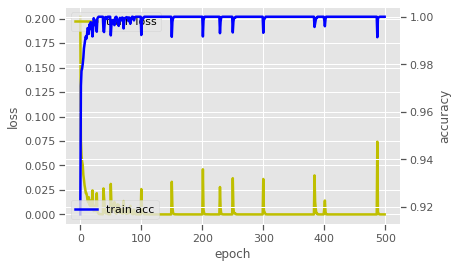

In [64]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_dnn.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_dnn.history['binary_accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

## Keras Logistic regression

In [65]:
model_log = models.Sequential(name='Logistic')
model_log.add(layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1], )))
#model.add(layers.Dropout(0.5))

model_log.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [66]:
model_log.summary()

Model: "Logistic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [71]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)
hist_log = []
with tqdm(total=10, ascii=True) as pbar:
    for train_index, test_index in kfold.split(X_train, Y_train):
        X_train_log, X_val_log = X_train.loc[train_index], X_train.loc[test_index]
        Y_train_log, Y_val_log = Y_train.loc[train_index], Y_train.loc[test_index]
        hist_log = model_log.fit(X_train_log, Y_train_log, validation_data=(X_val_log, Y_val_log), \
                             epochs=50, use_multiprocessing=True, workers=-1, verbose=0, callbacks=hist_log)
        pbar.update(1)

100%|##################################################################################| 10/10 [00:43<00:00,  4.37s/it]


In [68]:
model_log.evaluate(X_test, Y_test)

57/57 [==============================] - 0s 331us/step - loss: 0.1997 - binary_accuracy: 0.9248


[0.19973152875900269, 0.9247787594795227]

In [69]:
model_log_pred = model_log.predict(X_test)
print_clf_eval(Y_test, model_log_pred)

=Confusion matrix=
[[848  56]
 [ 86 818]]
Acc : 0.9215, Pre : 0.9359
Re : 0.9049, F1 : 0.9201, AUC : 0.9215


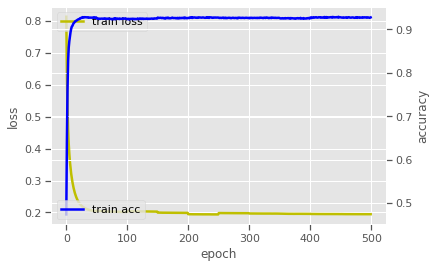

In [70]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_log.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_log.history['binary_accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

## Sklearn Logistic regression

In [72]:
sk_log = LogisticRegression(random_state=13, solver='liblinear')
sk_log.fit(X_train, Y_train)
sk_log_pred = sk_log.predict(X_test)

print_clf_eval(Y_test, sk_log_pred)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
sk_log_cv = cross_val_score(sk_log, X_train, Y_train, cv=kfold)
print("K-Fold Cross Validation :", sk_log_cv.mean())

=Confusion matrix=
[[824  80]
 [ 58 846]]
Acc : 0.9237, Pre : 0.9136
Re : 0.9358, F1 : 0.9246, AUC : 0.9237
K-Fold Cross Validation : 0.9253112033195021


7230

## Sklearn Logistic regression - GridsearchCV

In [51]:
params = { \
          'random_state' : range(0, 11), \
          'solver' : ['liblinear'], \
          'max_iter' : range(0, 101, 10), \
          'n_jobs' : [-1]
}

grid_sk_log = LogisticRegression()
grid_sk_log = GridSearchCV(grid_sk_log, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_sk_log.fit(X_train, Y_train)

print('Best parameters : ', grid_sk_log.best_params_)
print('Best score : ', grid_sk_log.best_score_)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    4.1s


Best parameters :  {'max_iter': 10, 'n_jobs': -1, 'random_state': 0, 'solver': 'liblinear'}
Best score :  0.9268326417704011


[Parallel(n_jobs=-1)]: Done 582 out of 605 | elapsed:    4.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:    4.6s finished


In [59]:
grid_sk_log_est = grid_sk_log.best_estimator_
grid_sk_log_pred = grid_sk_log_est.predict(X_test)

print_clf_eval(Y_test, grid_sk_log_pred)

Best parameters :  {'max_iter': 10, 'n_jobs': -1, 'random_state': 0, 'solver': 'liblinear'}
Best score :  0.9243430152143846
=Confusion matrix=
[[824  80]
 [ 58 846]]
Acc : 0.9237, Pre : 0.9136
Re : 0.9358, F1 : 0.9246, AUC : 0.9237


KeyboardInterrupt: 

## Sklearn Decision Tree

In [60]:
sk_tree = DecisionTreeClassifier(random_state=13, max_depth=5)
sk_tree.fit(X_train, Y_train)
sk_tree_pred = sk_tree.predict(X_test)

print_clf_eval(Y_test, sk_tree_pred)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
sk_tree_cv = cross_val_score(sk_tree, X_train, Y_train, cv=kfold)
print("K-Fold Cross Validation :", sk_tree_cv.mean())

=Confusion matrix=
[[886  18]
 [ 21 883]]
Acc : 0.9784, Pre : 0.9800
Re : 0.9768, F1 : 0.9784, AUC : 0.9784
K-Fold Cross Validation : 0.9811894882434302


## Sklearn Decision Tree - GridsearchCV

In [52]:
params = { \
          'random_state' : range(0, 11), \
          'max_depth' : range(-1, 11), \
          'min_samples_split' : [2, 3]
}

grid_sk_tree = DecisionTreeClassifier()
grid_sk_tree = GridSearchCV(grid_sk_tree, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_sk_tree.fit(X_train, Y_train)

print('Best parameters : ', grid_sk_tree.best_params_)
print('Best score : ', grid_sk_tree.best_score_)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


Best parameters :  {'max_depth': 9, 'min_samples_split': 2, 'random_state': 10}
Best score :  0.9875518672199171


[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:    2.2s finished


In [61]:
grid_sk_tree_est = grid_sk_tree.best_estimator_
grid_sk_tree_pred = grid_sk_tree_est.predict(X_test)

print_clf_eval(Y_test, grid_sk_tree_pred)

Best parameters :  {'max_depth': 10, 'max_features': 9, 'min_samples_split': 2, 'random_state': 0}
Best score :  0.9867219917012449
=Confusion matrix=
[[889  15]
 [ 12 892]]
Acc : 0.9851, Pre : 0.9835
Re : 0.9867, F1 : 0.9851, AUC : 0.9851


## Sklearn RandomForest

In [65]:
sk_rf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
sk_rf.fit(X_train, Y_train)
sk_rf_pred = sk_rf.predict(X_test)

print_clf_eval(Y_test, sk_rf_pred)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
sk_rf_cv = cross_val_score(sk_rf, X_train, Y_train, cv=kfold)
print("K-Fold Cross Validation :", sk_rf_cv.mean())

=Confusion matrix=
[[894  10]
 [  9 895]]
Acc : 0.9895, Pre : 0.9890
Re : 0.9900, F1 : 0.9895, AUC : 0.9895
K-Fold Cross Validation : 0.9921161825726141


## Sklearn RandomForest - GridsearchCV

In [55]:
# 주의!!! 매우 오래걸림!!!!!!!

params = { \
          'random_state' : range(0, 11, 2), \
          'n_estimators' : range(100, 501, 100), \
          'max_depth' : [None, 5, 10, 15, 20], \
          'min_samples_split' : [2, 3], \
          'bootstrap' : [True, False], \
          'n_jobs' : [-1]
}

grid_sk_rf = RandomForestClassifier()
grid_sk_rf = GridSearchCV(grid_sk_rf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_sk_rf.fit(X_train, Y_train)

print('Best parameters : ', grid_sk_rf.best_params_)
print('Best score : ', grid_sk_rf.best_score_)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min


KeyboardInterrupt: 

In [ ]:
grid_sk_rf_est = grid_sk_rf.best_estimator_
grid_sk_rf_pred = grid_sk_rf_est.predict(X_test)

print_clf_eval(Y_test, grid_sk_rf_pred)

## LightGBM

In [67]:
lgbm = LGBMClassifier(n_estimators=30, num_leaves=20, n_jobs=-1, boost_from_average=False, random_state=13)
lgbm.fit(X_train, Y_train)
lgbm_pred = lgbm.predict(X_test)

print_clf_eval(Y_test, lgbm_pred)

kfold = StratifiedKFold(n_splits=10, shuffle=True)
lgbm_cv = cross_val_score(lgbm, X_train, Y_train, cv=kfold)
print("K-Fold Cross Validation :", lgbm_cv.mean())

=Confusion matrix=
[[891  13]
 [ 10 894]]
Acc : 0.9873, Pre : 0.9857
Re : 0.9889, F1 : 0.9873, AUC : 0.9873
K-Fold Cross Validation : 0.9850622406639005


## LightGBM - GridsearchCV

In [56]:
# 주의!!! 매우 오래걸림!!!!!!!

params = { \
          'boosting_type' : ['gbdt', 'dart', 'goss'], \
          'random_state' : range(0, 11, 2), \
          'n_estimators' : range(100, 501, 100), \
          'num_leaves' : range(10, 51, 10), \
          'max_depth' : range(-1, 11, 2), \
          'learning_rate' : [0.1, 0.01], \
          'n_jobs' : [-1]
}

grid_lgbm = LGBMClassifier()
grid_lgbm = GridSearchCV(grid_lgbm, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid_lgbm.fit(X_train, Y_train)

print('Best parameters : ', grid_lgbm.best_params_)
print('Best score : ', grid_lgbm.best_score_)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
exception calling callback for <Future at 0x2720ab14fd0 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 799, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\hamer\anaconda3\lib\

KeyboardInterrupt: 

exception calling callback for <Future at 0x2720a59d190 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 366, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 799, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\hamer\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError:

In [ ]:
grid_lgbm_est = grid_lgbm.best_estimator_
grid_lgbm_pred = grid_lgbm_est.predict(X_test)

print_clf_eval(Y_test, grid_lgbm_pred)

## XG Boost

In [201]:
xgb=XGBClassifier(use_label_encoder=False,random_state=42,eval_metric='mlogloss')
xgb.fit(X_train,Y_train)
xgb_pred = xgb.predict(X_test)

print_clf_eval(Y_test, xgb_pred)

=Confusion matrix=
[[895   9]
 [  3 901]]
Acc : 0.9934, Pre : 0.9901
Re : 0.9967, F1 : 0.9934, AUC : 0.9934


# Summary : 성능평가

In [202]:
indexs = ['Keras MLP', 'Keras DNN', 'Keras logistic regression', 'Sklearn logistic regression', 'Sklearn Decision Tree', 'Sklearn RandomForest', 'LightGBM','XG Boost']
columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
temp = []

temp.append(get_clf_eval(Y_test, model_mlp_pred))
temp.append(get_clf_eval(Y_test, model_dnn_pred))
temp.append(get_clf_eval(Y_test, model_log_pred))
temp.append(get_clf_eval(Y_test, sk_log_pred))
temp.append(get_clf_eval(Y_test, sk_tree_pred))
temp.append(get_clf_eval(Y_test, sk_rf_pred))
temp.append(get_clf_eval(Y_test, lgbm_pred))
temp.append(get_clf_eval(Y_test, xgb_pred))

results = pd.DataFrame(temp, index=indexs, columns=columns)
results.sort_values(by=['F1-score'], axis=0, ascending=False)

,Accuracy,Precision,Recall,F1-score,ROC-AUC
XG Boost,0.993363,0.990110,0.996681,0.993385,0.993363
Sklearn RandomForest,0.991150,0.986842,0.995575,0.991189,0.991150
LightGBM,0.990044,0.986813,0.993363,0.990077,0.990044
Keras DNN,0.989491,0.982552,0.996681,0.989566,0.989491
Keras MLP,0.988938,0.982533,0.995575,0.989011,0.988938
Sklearn Decision Tree,0.981748,0.969795,0.994469,0.981977,0.981748
Sklearn logistic regression,0.922013,0.914224,0.931416,0.922740,0.922013
Keras logistic regression,0.922566,0.934091,0.909292,0.921525,0.922566


## 의사결정 나무 (sk_tree) 랜덤포레스트 (sk_rf)를 통한 중요 변수 확인

In [203]:
feature_importance = pd.DataFrame(sk_rf.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feature_importance 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
feature_importance,0.024029,0.020619,0.466673,0.023008,0.061103,0.203873,0.029806,0.005514,0.021558,0.008372,0.010736,0.10508,0.00946,0.010169


In [204]:
feature_importance = pd.DataFrame(sk_tree.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feature_importance 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
feature_importance,0.000577,0.003792,0.679115,0.001508,0.121583,0.070748,0.0,0.0,0.000548,0.0,0.0,0.12213,0.0,0.0
